**Exploring Fashion Trends: Myntra's Information**


**1. Load Data and Overview**
* Load the data
* Undestand the data
* Clean the dataset 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

#Load the data fron Myntra and check the first rows.
df = pd.read_csv("/kaggle/input/fashion-clothing-products-catalog/myntra_products_catalog.csv")
df.head()

#Check the size of the dataset 
df.shape

(12491, 8)

In [2]:
#Display info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


In [3]:
#Describe the dataset 
df.describe()

,ProductID,Price (INR),NumImages
count,1.249100e+04,12491.000000,12491.000000
mean,9.917160e+06,1452.660956,4.913698
std,1.438006e+06,2118.503976,1.092333
min,1.012060e+05,90.000000,1.000000
25%,1.006215e+07,649.000000,5.000000
50%,1.015463e+07,920.000000,5.000000
75%,1.021565e+07,1499.000000,5.000000
max,1.027514e+07,63090.000000,10.000000


In [4]:
#Sum the missing values 
df_null = df.isnull().sum()
df_null

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

**2. Clean the data**

In this case, as missing value are less than 10% I will delete the rows of the dataset.
In case there are, remove duplicates.

In [5]:
#Clean data, drop rows that have missing values.
df = df.dropna()

In [6]:
#Check for duplicates 
df_duplicates = df.duplicated().sum()
df_duplicates

0

**3. Exploratory Analysis **

In [7]:
#Count the products by gender
count_gender = df["Gender"].value_counts()
count_gender

Gender
Women          4732
Men            4343
Unisex         1056
Boys           1032
Girls           388
Unisex Kids      46
Name: count, dtype: int64

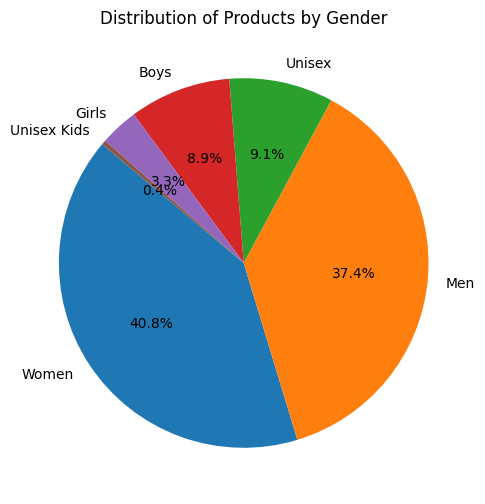

In [8]:
#Pie chart of count by gender
labels = count_gender.index
gender_amount = count_gender.values
plt.figure(figsize=(8,6))
plt.pie(gender_amount,labels=labels, autopct='%1.1f%%',startangle= 140)
plt.title('Distribution of Products by Gender')
plt.show()

In [9]:
#Calculate the average price per gender
avg_price_gender = df.groupby("Gender")["Price (INR)"].mean()
avg_price_gender

Gender
Boys            817.713178
Girls           909.162371
Men            1587.423440
Unisex         2294.987689
Unisex Kids    1082.717391
Women          1347.861581
Name: Price (INR), dtype: float64

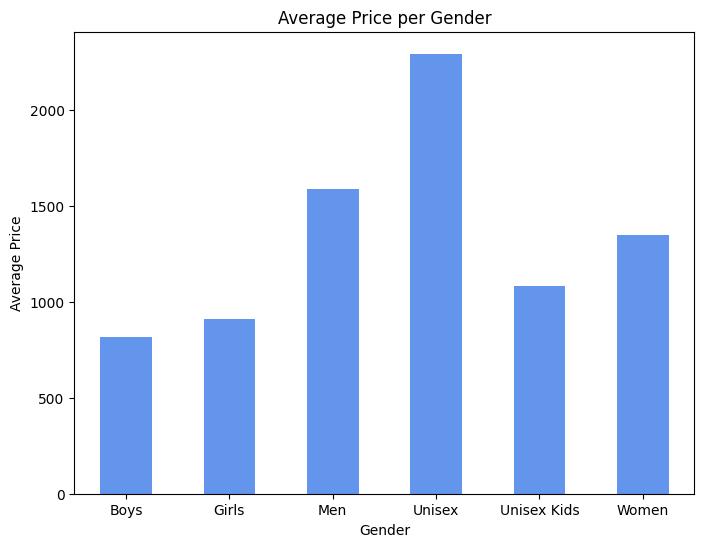

In [10]:
#Bar plot of the average price per gender
plt.figure(figsize=(8,6))
avg_price_gender.plot(kind="bar",color="cornflowerblue", linewidth=1)
plt.xlabel("Gender")
plt.ylabel("Average Price")
plt.title("Average Price per Gender")
plt.xticks(rotation=0)
plt.show()

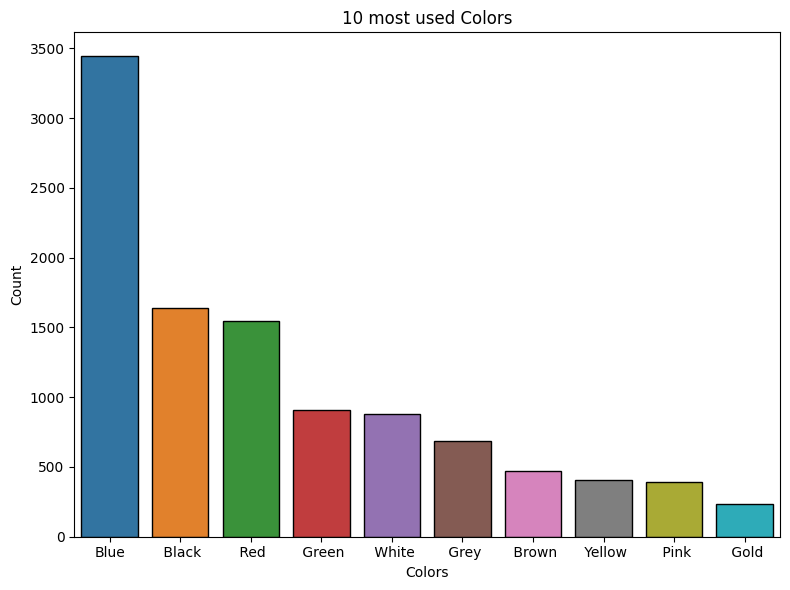

In [11]:
#Count most popular colors 
plt.figure(figsize=(8,6))
color_count = sns.countplot(data=df,x="PrimaryColor",linewidth=1,edgecolor="black",order=df["PrimaryColor"].value_counts().index[0:10])
plt.xlabel("Colors")
plt.ylabel("Count")
plt.title("10 most used Colors")
plt.tight_layout()
plt.show()

/tmp/ipykernel_33/4177420887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_men_df["PrimaryColor"] = women_men_df["PrimaryColor"].fillna("Uknown")


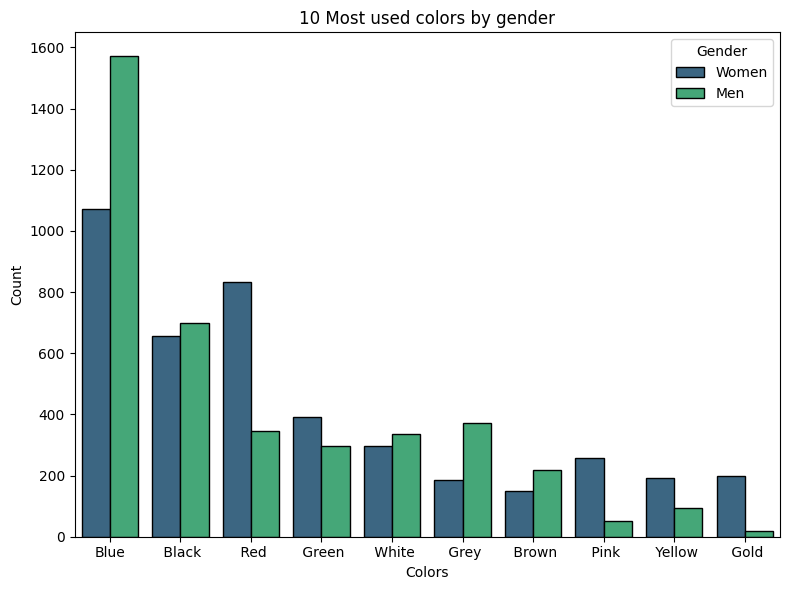

In [12]:
#Filter database for only Men and Women.
women_men_df = df[df["Gender"].isin(["Men", "Women"])]
women_men_df["PrimaryColor"] = women_men_df["PrimaryColor"].fillna("Uknown")
#Countplot of colors for men a women
plt.figure(figsize=(8,6))
sns.countplot(data=women_men_df,x="PrimaryColor",hue="Gender",linewidth=1,edgecolor="black",palette="viridis",order=women_men_df["PrimaryColor"].value_counts().index[0:10])
plt.ylabel("Count")
plt.xlabel("Colors")
plt.title("10 Most used colors by gender")
plt.tight_layout()
plt.show()

**Price Distribution**

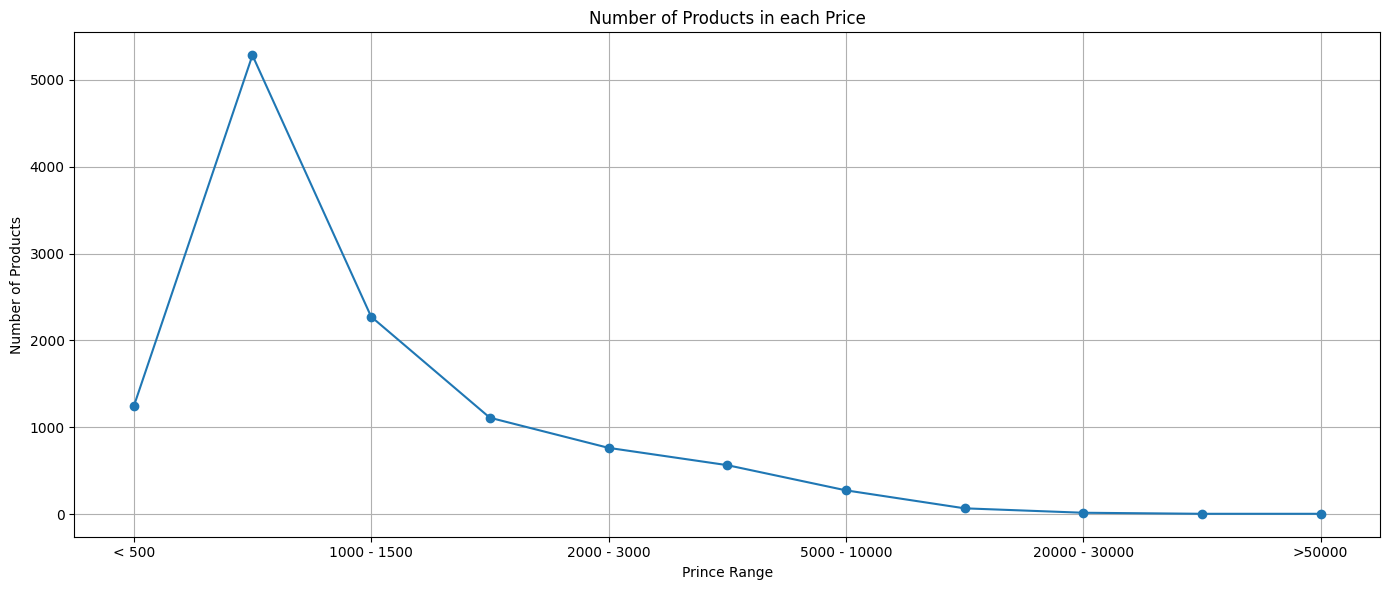

In [13]:
#Price distribution analysis.
price_bins = [0, 500, 1000, 1500, 2000, 3000, 5000, 10000, 20000, 30000, 50000, float("inf")]
price_labels = ["< 500","500 - 1000","1000 - 1500","1500 - 2000","2000 - 3000","3000 - 5000","5000 - 10000","10000  - 20000","20000 - 30000","30000 - 50000",">50000"]

#Bin the price data.
df["PriceRange"] = pd.cut(df["Price (INR)"], bins=price_bins,labels=price_labels, right=False)
#Count the number of products in each bin.
price_range_counts = df["PriceRange"].value_counts().sort_index()

#plot the graph
plt.figure(figsize=(14,6))
price_range_counts.plot(kind="line",marker="o")
plt.ylabel("Number of Products")
plt.xlabel("Prince Range")
plt.title("Number of Products in each Price")
plt.grid()
plt.tight_layout()
plt.show()

**Brand Popularity Analysis and Price**

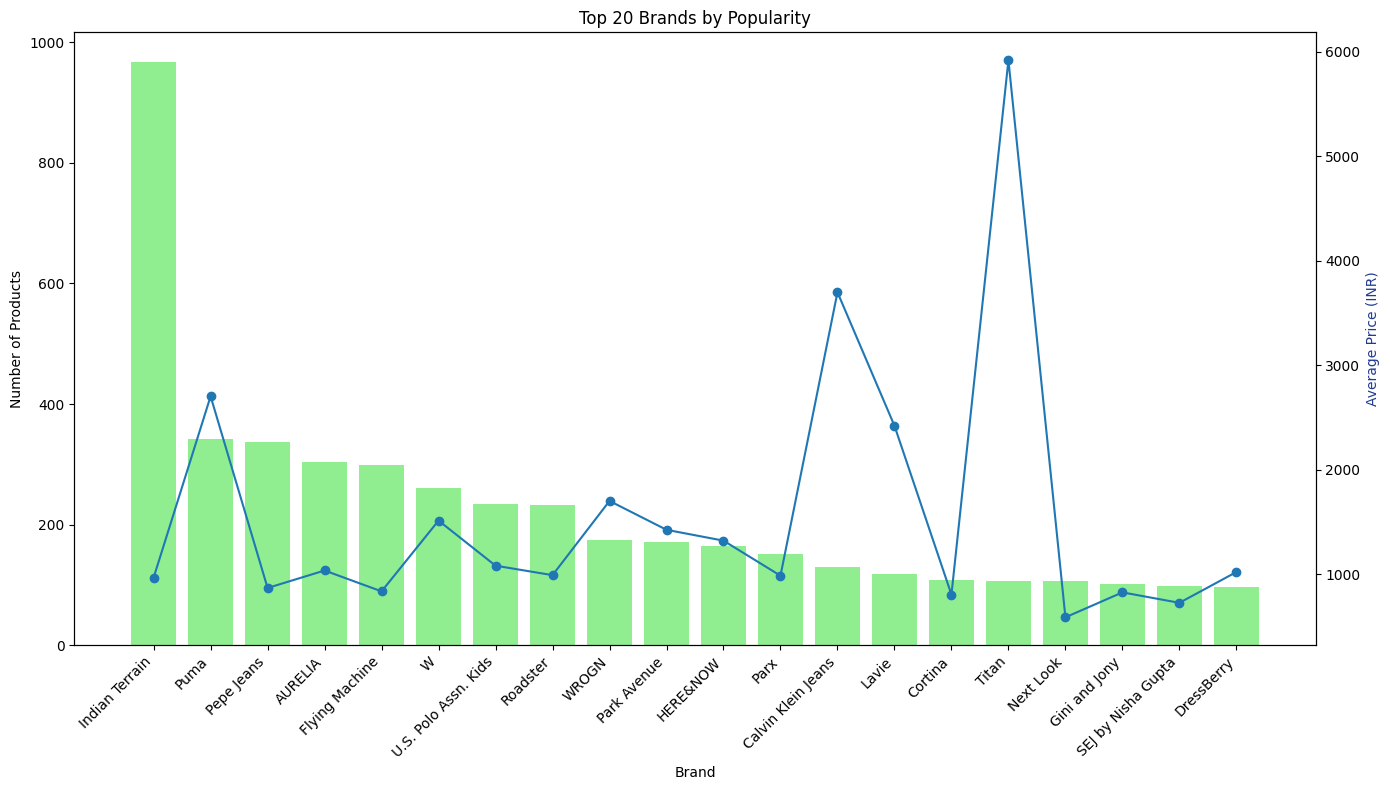

In [14]:
#Brand popularity analysis
top_brands = df["ProductBrand"].value_counts().head(20).index
brand_counts = df["ProductBrand"].value_counts().head(20)

#Calculate the avg price per brand, top 20.
avg_price_brand = df[df["ProductBrand"].isin(top_brands)].groupby("ProductBrand")["Price (INR)"].mean().reindex(top_brands)

# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 8))
color="lightgreen"
ax1.set_xlabel('Brand')
ax1.set_ylabel('Number of Products')
ax1.bar(brand_counts.index, brand_counts.values, color=color)
ax1.tick_params(axis='y')
ax1.set_xticks(range(len(brand_counts.index))) 
ax1.set_xticklabels(brand_counts.index, rotation=45, ha='right')

# Line graph for average price
ax2 = ax1.twinx()
ax2.set_ylabel('Average Price (INR)', color='#213B91')
ax2.plot(avg_price_brand.index, avg_price_brand.values, marker='o')
ax2.tick_params(axis='y')

plt.title('Top 20 Brands by Popularity')
fig.tight_layout()
plt.show()


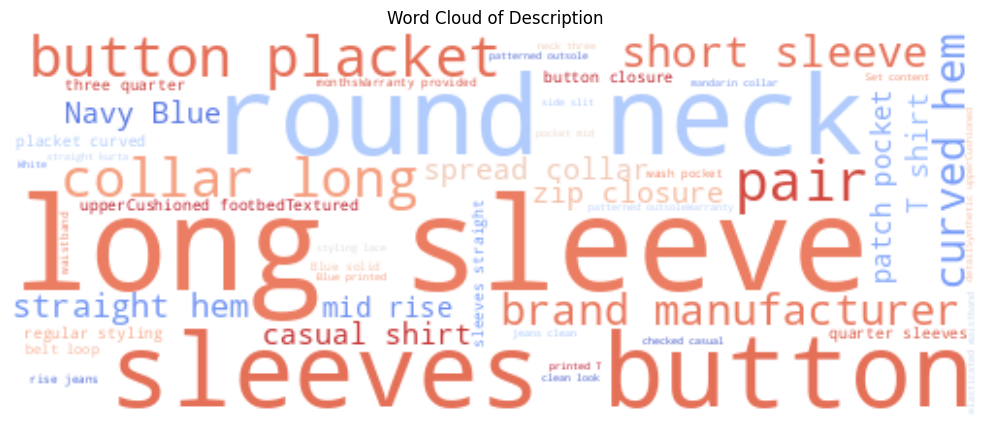

In [15]:
# Word Cloud of Description
t = str(list(df['Description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
wc = WordCloud(background_color = 'white', width = 500,  height = 200,colormap='coolwarm', max_words = 150).generate(t)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout()
plt.title('Word Cloud of Description')
plt.show()

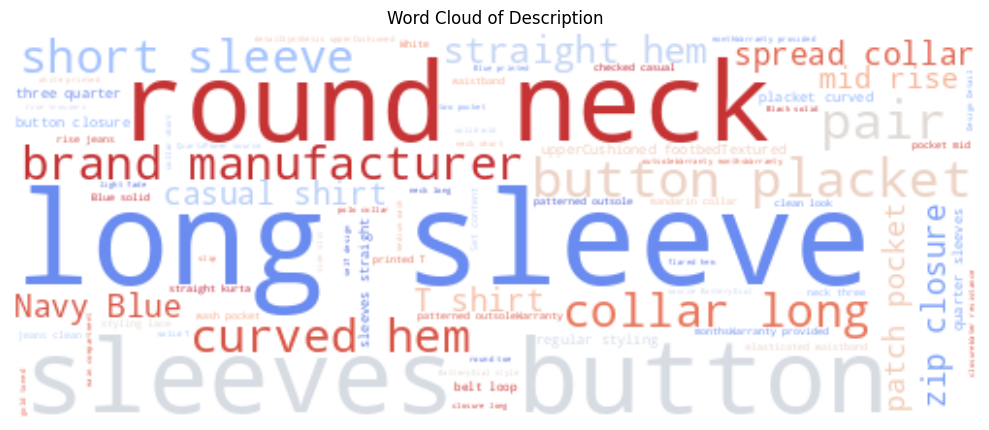

In [16]:
# Word Cloud of Description
t = str(list(df['Description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
wc = WordCloud(background_color = 'white', width = 500,  height = 200,colormap='coolwarm', max_words = 150).generate(t)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout()
plt.title('Word Cloud of Description')
plt.show()

**Conclusion**

1. Gender Sepecific

- The company sells mostly adult clothing. Men and women clothing represent 78% of the total.
- Unisex clothing has the highest average price, while it only represents 9% of the total.
- Boys and Girl clothing are chepear than adult clothing. This could be as designs are simpler and sizes are smaller. Also, adults are not willing to spend more money in child clothing.

Men Fashion

Men have a clear color preference for Blue and Black. Also,the least prefered colors by Men are Gold, Pink and Yellow.
Also, Men clothing has an average price that is higher than women clothing.

Women Fashion

Women prefer to use Blue, Black an Red in their clothes. The least prefered colors by Women are Brown, Yellow, Gold and Grey.
Women clothing price is less expensve on average than men.

2. Color Distribution:

Blue is the most preferred color. Black and Red follows, however they represent less than half of Blue count.
Less Common Colors: Colors like Mustard, Magenta, Charcoal, Rose, Platinum, and Peach, each with fewer than 20 products.

Comparison Between Genders:¶

Shared Popular Colors: Both men and women favor Blue, Black, and Red, indicating these colors are universally popular.
Gender-Specific Trends: Women have a higher preference for colors like Pink and Gold, while men prefer colors like Grey and Brown.
Color Variety: Women's fashion shows a broader variety of colors, including more vibrant and metallic shades such as, compared to men's fashion which leans towards more neutral and subdued colors.

3. Pricing Insights:

Right-Skewed Distribution: The price distribution is right-skewed, indicating that most products are on the lower end with a few expensive outliers.
Target Audience: Given that the bulk of the products are priced under INR 2000, the target audience is likely to be shoppers who are looking for affordable fashion options.
High-End Products: The very small number of high-end products (above INR 20000) implies that the catalog does not focus significantly on luxury items.
Business Strategy: The retailer might be adopting a high-volume, low-margin strategy for most of their products, while also offering a few high-margin luxury items.

linkcode
1. Gender-Specific Insights:

Dominance of Adult Clothing: The majority of the products are targeted towards adults, with Women and Men categories making up a significant portion (78%) of the dataset.
The higher average price of Unisex products suggests that these items may be of higher quality, branded, or specialized items that cater to a broader audience.
The lower price points for Boys and Girls products align with typical market trends where children's clothing is generally less expensive due to factors like smaller sizes and less complex designs.
Women’s Fashion:

Top Colors: Blue, Red, and Black are the most common colors in women's fashion, suggesting that these colors are highly favored by female consumers.
Pink is significantly more prominent in women's fashion, with 258 products, indicating its popularity.
Unique Preferences: Colors like Gold and Silver have higher representation in women's products, which could be linked to their appeal in accessories and formal wear.
Men’s Fashion:

Top Colors: Blue, and Black dominate men's fashion, indicating these colors are staples in men's wardrobes.
Distinct Preferences: Colors like Khaki and Charcoal are more commonly found in men's fashion, which could be attributed to their association with more neutral and earthy tones preferred by men.
2. Color Distribution:

Overall Color Distribution:

Most Common Colors: Blue is the most dominant color across the dataset, reflecting a strong trend for this color in fashion products. Followed by Black and Red, suggesting these colors are also popular choices.
Other significant colors include Green, White, Grey, and Brown, each with substantial counts
Less Common Colors: Colors like Mustard, Magenta, Charcoal, Rose, Platinum, and Peach, each with fewer than 20 products.

Comparison Between Genders:

Shared Popular Colors: Both men and women favor Blue, Black, and Red, indicating these colors are universally popular.
Gender-Specific Trends: Women have a higher preference for colors like Pink and Gold, while men prefer colors like Grey and Khaki.
Color Variety: Women's fashion shows a broader variety of colors, including more vibrant and metallic shades such as, compared to men's fashion which leans towards more neutral and subdued colors.

3. Pricing Insights:

Right-Skewed Distribution: The price distribution is right-skewed, indicating that most products are on the lower end of the price spectrum., with a few expensive outliers.
Target Audience: Given that the bulk of the products are priced under INR 2000, the target audience is likely to be shoppers who are looking for affordable fashion options.
High-End Products: The very small number of high-end products (above INR 20000) implies that the catalog does not focus significantly on luxury items.
Business Strategy: The retailer might be adopting a high-volume, low-margin strategy for most of their products, while also offering a few high-margin luxury items.

4. Brand Analysis:

Dominant Brands: Indian Terrain stands out as the brand with the highest number of products (968). This indicates a strong presence and potentially high customer demand or broad product range.
Premium vs. Budget Brands: Titan has the highest average price (5918.24 INR), positioning it as a premium brand in the dataset. Next Look has the lowest average price (587.77 INR), indicating it is more of a budget-friendly brand.
Mid-Range Brands: Brands like Puma (2702.63 INR), Calvin Klein Jeans (3697.85 INR), and Lavie (2420.78 INR) fall into the higher mid-range category, suggesting they offer a balance between quality and affordability. Pepe Jeans (868.53 INR) and Flying Machine (836.09 INR) offer more budget-friendly options while still maintaining a notable presence.
Niche and Specialized Brands: U.S. Polo Assn. Kids focuses on children's fashion, and its average price (1081.93 INR) suggests mid-range pricing for this segment. SEJ by Nisha Gupta and DressBerry also have a smaller product range but offer competitively priced items.

6. Word Cloud Analysys
After running a word cloud analysis, there is a clear peference of "longs sleeves","round neck" and "Navy Blue" as preferred color.

5. Strategy
Mintra adopt a high-volume, low-margin business strategy for most of their produdcts. Also, they offer certain premium items for a specific niche.
They use different brands to offer a balance between luxury and affordable clothes target to different audiencies.

